In [16]:
# -*- coding: utf-8 -*-
"""Entraînement d’un PMC, d’un réseau de neurones profond de type CNN et transfert d’apprentissage"""


#  IMPORTATIONS
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import time

# Chargement des données


In [17]:
# Chargement des données
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print("✅ Données chargées avec succès")
print(f"Train shape: {train_data.shape}, Test shape: {test_data.shape}")


✅ Données chargées avec succès
Train shape: (7352, 563), Test shape: (2947, 563)


# Suppression de la colonne 'subject'

In [18]:
# Suppression de la colonne 'subject'
train_data.drop(columns=['subject'], inplace=True, errors='ignore')
test_data.drop(columns=['subject'], inplace=True, errors='ignore')

print("\n✅ Nettoyage terminé")
print(f"Nouvelles dimensions - Train: {train_data.shape}, Test: {test_data.shape}")



✅ Nettoyage terminé
Nouvelles dimensions - Train: (7352, 562), Test: (2947, 562)


# Sélection des features avec variance > 0.1



In [19]:
# Sélection des features avec variance > 0.1
selector = VarianceThreshold(threshold=0.1)
X_train = selector.fit_transform(train_data.drop(columns=['Activity']))
X_test = selector.transform(test_data.drop(columns=['Activity']))

print("\n✅ Sélection de features terminée")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


✅ Sélection de features terminée
X_train shape: (7352, 189), X_test shape: (2947, 189)


# ENCODAGE DES LABELS


In [20]:
# ENCODAGE DES LABELS
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['Activity'])
y_test = label_encoder.transform(test_data['Activity'])

print("\n✅ Encodage des labels terminé")
print("Exemple de labels:", y_train[:5])


✅ Encodage des labels terminé
Exemple de labels: [2 2 2 2 2]


NORMALISATION DES DONNÉES


In [21]:
# NORMALISATION DES DONNÉES
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\n✅ Normalisation terminée")
print("Moyenne (train):", np.mean(X_train), "Écart-type (train):", np.std(X_train))



✅ Normalisation terminée
Moyenne (train): 1.963604983360382e-18 Écart-type (train): 0.9999999999999998


# DIVISION ENTRAÎNEMENT/VALIDATION


In [22]:
# DIVISION ENTRAÎNEMENT/VALIDATION
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

print("\n✅ Division train/val effectuée")
print(f"X_train: {X_train.shape}, X_val: {X_val.shape}")


✅ Division train/val effectuée
X_train: (5881, 189), X_val: (1471, 189)


# ARCHITECTURE DU MODÈLE (Question 2.1.1)


In [23]:
#  ARCHITECTURE DU MODÈLE (Question 2.1.1)
model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(512, activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, activation='relu'),
    BatchNormalization(),

    Dense(6, activation='softmax')
])

print("\n✅ Architecture du modèle créée")
model.summary()


✅ Architecture du modèle créée


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1024)                │         194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 859,398 (3.28 MB)

 Trainable params: 855,814 (3.26 MB)

 Non-trainable params: 3,584 (14.00 KB)

#  COMPILATION DU MODÈLE


In [24]:
# COMPILATION DU MODÈLE
optimizer = Adam(learning_rate=0.001, decay=1e-5)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\n✅ Modèle compilé avec succès")


✅ Modèle compilé avec succès


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


#  DÉFINITION DES CALLBACKS


In [25]:
#  DÉFINITION DES CALLBACKS
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=25,
    mode='max',
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=10,
    min_lr=1e-7
)

print("\n✅ Callbacks configurés")


✅ Callbacks configurés


#  ENTRAÎNEMENT DU MODÈLE (Question 2.1.2)


In [26]:
#  ENTRAÎNEMENT DU MODÈLE (Question 2.1.2)
start_time = time.time()

history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=256,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

training_time = time.time() - start_time

print("\n✅ Entraînement terminé")
print(f"Temps total: {training_time:.2f} secondes")

Epoch 1/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.6831 - loss: 7.3160 - val_accuracy: 0.7845 - val_loss: 5.5363 - learning_rate: 0.0010
Epoch 2/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9162 - loss: 4.7249 - val_accuracy: 0.8770 - val_loss: 3.4651 - learning_rate: 0.0010
Epoch 3/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.9435 - loss: 2.9094 - val_accuracy: 0.9463 - val_loss: 2.0759 - learning_rate: 0.0010
Epoch 4/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9572 - loss: 1.7360 - val_accuracy: 0.9375 - val_loss: 1.3017 - learning_rate: 0.0010
Epoch 5/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9597 - loss: 1.0544 - val_accuracy: 0.9680 - val_loss: 0.8488 - learning_rate: 0.0010
Epoch 6/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9598 - loss: 0.6996 - val_accuracy: 0.8538 - val_loss: 0.7407 - learning_rate: 0.0010
Epoch 7/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9476 - loss: 0.5246 -

#  CONVERSION EN TFLITE


In [27]:
#  CONVERSION EN TFLITE
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
    f.write(tflite_model)

print("\n✅ Modèle TFLite exporté")

Saved artifact at '/tmp/tmpnw9das89'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 189), dtype=tf.float32, name='keras_tensor_10')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  134175733810000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134175733811536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134175733811728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134175733810960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134175733809232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134175733811344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134175733813264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134175733813840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134175733814032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134175733812880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134175733810576: Te

# ÉVALUATION DU MODÈLE (Question 2.1.3)


In [28]:
#  ÉVALUATION DU MODÈLE (Question 2.1.3)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("\n=== RÉSULTATS FINAUX ===")
print(f"Test Accuracy: {test_accuracy:.4f} (>96% : {'✓' if test_accuracy >= 0.96 else '✗'})")
print(f"Temps d'entraînement: {training_time:.2f}s")


=== RÉSULTATS FINAUX ===
Test Accuracy: 0.9552 (>96% : ✗)
Temps d'entraînement: 224.36s


#  VISUALISATION DES COURBES


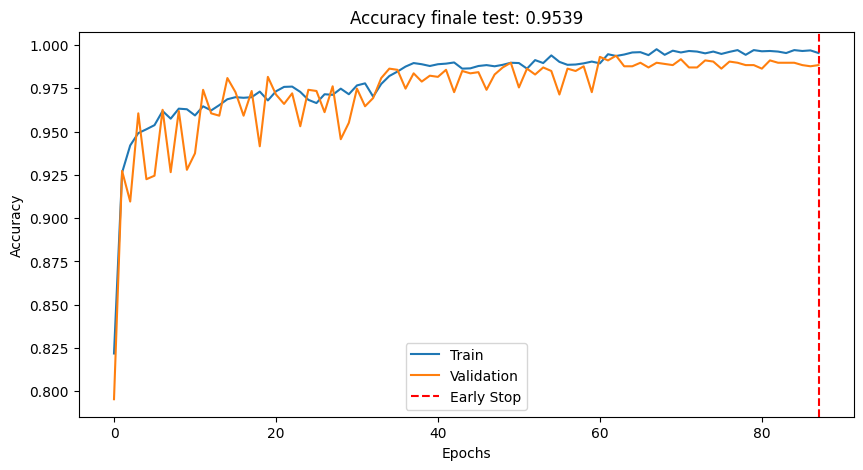

In [14]:
#  VISUALISATION DES COURBES
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.axvline(early_stop.stopped_epoch, color='red', linestyle='--', label='Early Stop')
plt.title(f"Accuracy finale test: {test_accuracy:.4f}")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()